# 3 Quarantine

Here we show how quarantine is implemented in the model and how it affects the model.

In [1]:
import numpy as np

from EpiCommute import SIRModel

# Model setup

We again use a simple system, with a random mobility `mobility_baseline`.

Now we assume that mobility has been reduced due to lockdown measures. The new mobility is given by the matrix `mobility_current`, which is simply the baseline mobility flows reduced by random factors.

In [2]:
# Number and size of subpopulations
M = 20
subpopulation_sizes = np.random.randint(20,100,M)

# Initialize a random mobility matrix
mobility_baseline = np.random.rand(M, M)

# We assume mobility has decreased due to lockdown
mobility_current = mobility_baseline * (( np.random.rand(M,M) *0.5 ) + 0.5 )

## Quarantine scenarios

Quarantine is implemented in two different ways in the model:

 - The `isolation` scenario assumes that the reduced mobility means that individual stay at home, and are effectively removed from the dynamices.
 - The `distancing` scenario instead assumes that the reduced mobility corresponds to a reduction in contacts between individuals.
 
More detailed descriptions of both scenarios are given in the manuscript.

## Initialize and run scenarios

We now initialize and run three different variations of the model: no quarantine, isolation, and distancing.


In [3]:
model_no_quarantine = SIRModel(
            mobility_baseline,
            subpopulation_sizes,
            quarantine_mode = None,
            outbreak_source=0,
            VERBOSE=True
        )

model_isolation = SIRModel(
            mobility_current,
            subpopulation_sizes,
            mobility_baseline=mobility_baseline,   
            quarantine_mode = 'isolation',
            outbreak_source=0,
            VERBOSE=True
        )

model_distancing = SIRModel(
            mobility_current,
            subpopulation_sizes,
            mobility_baseline=mobility_baseline,   
            quarantine_mode = 'distancing',
            outbreak_source=0,
            VERBOSE=True
        )

Run simulations

In [4]:
results_no_quarantine = model_no_quarantine.run_simulation()

Starting Simulation ...
Simulation completed
Time: 0min 8.99s


In [5]:
results_isolation = model_isolation.run_simulation()

Starting Simulation ...
Simulation completed
Time: 0min 8.92s


In [6]:
results_distancing = model_distancing.run_simulation()

Starting Simulation ...
Simulation completed
Time: 0min 9.04s


## Comparison of results

We can see that both quarantine-scenarios "flatten the curve". 

The ``isolation`` scenario shows a flatter curve on average (but as we only run one simulation this doesn't have to be the case.

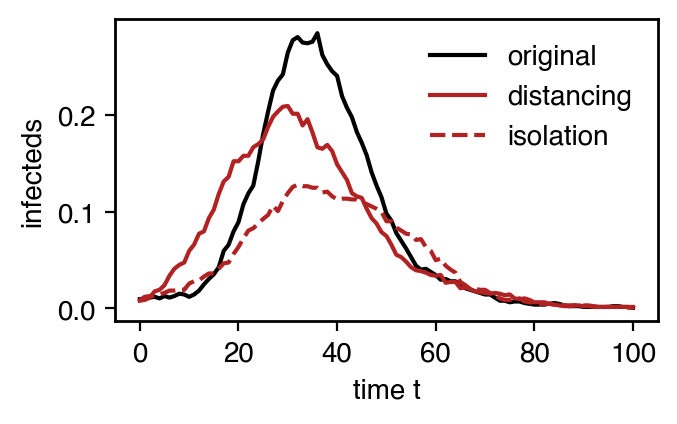

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('figure', dpi=200)

fig = plt.figure(figsize=(3.5,2))
plt.plot(results_no_quarantine['t'], results_no_quarantine['I_total'], label='original', color='k')
plt.plot(results_distancing['t'], results_distancing['I_total'], label='distancing', color='firebrick')
plt.plot(results_isolation['t'], results_isolation['I_total'], label='isolation', color='firebrick', linestyle='--')

plt.legend(frameon=False)
plt.xlabel("time t")
plt.ylabel("infecteds")
plt.show()